## Clustering Model

### Importing Modules and the Dataset 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df1 = pd.read_csv("state-wise-women1.csv") 
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   State                                                    37 non-null     object
 1   Cases pending investigation from previous year           37 non-null     int64 
 2   Cases reported during the
year                           37 non-null     int64 
 3   Total cases for investigation                            37 non-null     int64 
 4   No of cases withdrawn by the Govt during investigation   37 non-null     int64 
 5   Cases transferred to other Police Station or Magistrate  37 non-null     int64 
 6   Cases not investigated Under 157_1_b CRPC                37 non-null     int64 
 7   Cases Not Chargesheeted but final report Submitted       37 non-null     int64 
 8   Cases ended as final report false         

In [3]:
x = df1.iloc[:-1, 1:].values 
x[:5] 

array([[ 970,  994, 1964,    0,   10,    0,    7,   33,    3,    0,   43,
         937,  990,  974],
       [  34,   92,  126,    0,    0,    0,   14,    1,    3,    0,   18,
          63,   81,   45],
       [2981, 1779, 4760,    0,    6,    0,  449,    0,    0,    0,  449,
        1276, 1731, 3029],
       [ 861, 1008, 1869,    0,    0,    0,   33,   53,    7,    5,   98,
        1157, 1255,  614],
       [ 210, 1626, 1836,    0,    0,    0,   15,    8,    0,    0,   23,
        1608, 1631,  205]], dtype=int64)

### Applying Dendogram method to find Number of Clusters (Minimun Varience) 

Text(0.5, 1.0, 'Dendogram Chart')

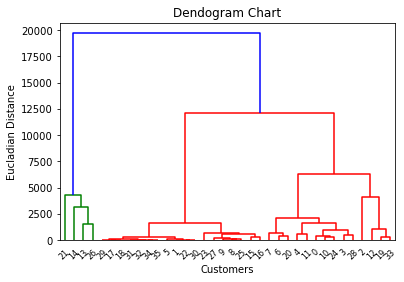

In [4]:
from scipy.cluster import hierarchy as spch 
spch.dendrogram(spch.linkage(x, method="ward")) 
plt.xlabel("Customers") 
plt.ylabel("Eucladian Distance") 
plt.title("Dendogram Chart") 

### Applying Elbow method to find Number of Clusters (Within Clusters Sum of Squares - WCSS). 

Text(0, 0.5, 'WCSS')

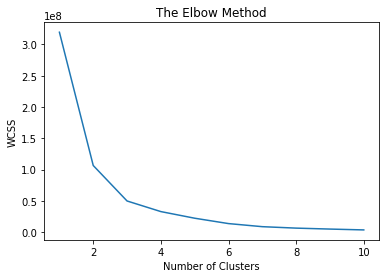

In [5]:
from sklearn.cluster import KMeans 
wcss = [] 
for i in range(1, 11): 
    kms = KMeans(n_clusters=i, random_state=42) 
    kms.fit(x) 
    wcss.append(kms.inertia_) 
plt.plot(range(1, 11), wcss) 
plt.title("The Elbow Method") 
plt.xlabel("Number of Clusters") 
plt.ylabel("WCSS") 

### Training Herarichal Model on the Dataset 

In [6]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=3) 
ypred1 = hc.fit_predict(x) 

In [7]:
ypred1

array([0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2], dtype=int64)

### Training K-Means Model on the Dataset 

In [8]:
from sklearn.cluster import KMeans 
kms = KMeans(n_clusters=3, random_state=42) 
ypred2 = kms.fit_predict(x)  

In [9]:
df1["State"]

0        Andhra Pradesh
1     Arunachal Pradesh
2                 Assam
3                 Bihar
4          Chhattisgarh
5                   Goa
6               Gujarat
7               Haryana
8     Himachal\nPradesh
9       Jammu & Kashmir
10            Jharkhand
11            Karnataka
12               Kerala
13       Madhya Pradesh
14          Maharashtra
15              Manipur
16            Meghalaya
17              Mizoram
18             Nagaland
19               Odisha
20               Punjab
21            Rajasthan
22               Sikkim
23           Tamil Nadu
24            Telangana
25              Tripura
26        Uttar Pradesh
27          Uttarakhand
28          West Bengal
29         A& N Islands
30           Chandigarh
31           D&N Haveli
32          Daman & Diu
33             Delhi UT
34          Lakshadweep
35           Puducherry
36                India
Name: State, dtype: object

In [10]:
ypred2 

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0])

### Visualizing the Clusters for Herarical Model. 

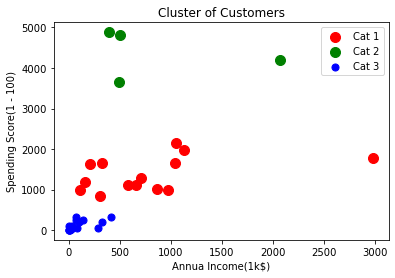

In [11]:
plt.scatter(x[ypred1 == 0, 0], x[ypred1 == 0, 1], s=100, c="red", label="Cat 1") 
plt.scatter(x[ypred1 == 1, 0], x[ypred1 == 1, 1], s=100, c="green", label="Cat 2") 
plt.scatter(x[ypred1 == 2, 0], x[ypred1 == 2, 1], s=50, c="blue", label="Cat 3") 
plt.title("Cluster of Customers") 
plt.xlabel("Annua Income(1k$)") 
plt.ylabel("Spending Score(1 - 100)") 
plt.legend() 

### Visualizing the Clusters KMeans Model. 

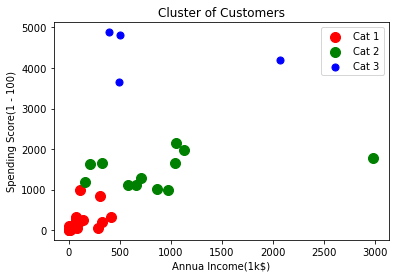

In [12]:
plt.scatter(x[ypred2 == 0, 0], x[ypred2 == 0, 1], s=100, c="red", label="Cat 1") 
plt.scatter(x[ypred2 == 1, 0], x[ypred2 == 1, 1], s=100, c="green", label="Cat 2") 
plt.scatter(x[ypred2 == 2, 0], x[ypred2 == 2, 1], s=50, c="blue", label="Cat 3") 
plt.title("Cluster of Customers") 
plt.xlabel("Annua Income(1k$)") 
plt.ylabel("Spending Score(1 - 100)") 
plt.legend() 

### End of the Project